In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import yfinance as yf
import datetime as dt

/Users/archit/Value-At-Risk/varenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
years = 15
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=years*365)

In [3]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [4]:
adj_close_df = pd.DataFrame()
adj_close_df = yf.download(tickers, start=startDate, end=endDate)['Adj Close']
adj_close_df

[*********************100%***********************]  5 of 5 completed


Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2009-08-31 00:00:00+00:00,51.408337,93.400002,34.978088,77.488129,39.282001
2009-09-01 00:00:00+00:00,51.467754,93.900002,34.322739,75.778938,38.415821
2009-09-02 00:00:00+00:00,51.578796,96.190002,34.296505,75.491585,38.256260
2009-09-03 00:00:00+00:00,51.487350,97.459999,34.523697,76.119278,38.605789
2009-09-04 00:00:00+00:00,51.435101,97.529999,35.266441,77.185608,39.099651
...,...,...,...,...,...
2024-08-20 00:00:00+00:00,74.559998,232.460007,480.260010,558.700012,275.079987
2024-08-21 00:00:00+00:00,74.720001,232.149994,482.500000,560.619995,276.459991
2024-08-22 00:00:00+00:00,74.419998,229.369995,474.850006,556.219971,274.119995


In [5]:
# daily log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns.dropna(inplace=True)
log_returns

Ticker,BND,GLD,QQQ,SPY,VTI
Date,,,,,
2009-09-01 00:00:00+00:00,0.001155,0.005339,-0.018914,-0.022304,-0.022297
2009-09-02 00:00:00+00:00,0.002155,0.024095,-0.000765,-0.003799,-0.004162
2009-09-03 00:00:00+00:00,-0.001775,0.013117,0.006603,0.008280,0.009095
2009-09-04 00:00:00+00:00,-0.001015,0.000718,0.021286,0.013911,0.012711
2009-09-08 00:00:00+00:00,-0.000508,-0.001026,0.009371,0.008585,0.010055
...,...,...,...,...,...
2024-08-20 00:00:00+00:00,0.002955,0.003663,-0.002101,-0.001627,-0.002433
2024-08-21 00:00:00+00:00,0.002144,-0.001335,0.004653,0.003431,0.005004
2024-08-22 00:00:00+00:00,-0.004023,-0.012047,-0.015982,-0.007879,-0.008500


In [6]:
# equally weighted portfolio
portofolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [23]:
# historical portfolio returns
historical_returns = (log_returns * weights).sum(axis=1)
historical_returns

Date
2009-09-01 00:00:00+00:00   -0.011404
2009-09-02 00:00:00+00:00    0.003505
2009-09-03 00:00:00+00:00    0.007064
2009-09-04 00:00:00+00:00    0.009522
2009-09-08 00:00:00+00:00    0.005295
                               ...   
2024-08-20 00:00:00+00:00    0.000091
2024-08-21 00:00:00+00:00    0.002779
2024-08-22 00:00:00+00:00   -0.009686
2024-08-23 00:00:00+00:00    0.009969
2024-08-26 00:00:00+00:00   -0.002511
Length: 3771, dtype: float64

In [32]:
# X-day historical returns
days = 5
historical_x_day_return = historical_returns.rolling(window=days).sum().dropna()
historical_x_day_return

Date
2009-09-08 00:00:00+00:00    0.013982
2009-09-09 00:00:00+00:00    0.030227
2009-09-10 00:00:00+00:00    0.034725
2009-09-11 00:00:00+00:00    0.030266
2009-09-14 00:00:00+00:00    0.021110
                               ...   
2024-08-20 00:00:00+00:00    0.024057
2024-08-21 00:00:00+00:00    0.026835
2024-08-22 00:00:00+00:00    0.005533
2024-08-23 00:00:00+00:00    0.009462
2024-08-26 00:00:00+00:00    0.000643
Length: 3767, dtype: float64

In [9]:
# covariance matrix for all securities
cov_matrix = log_returns.cov() * 252

In [10]:
# portfolio standard deviation
portfolio_st_dev = np.sqrt(weights.T @ cov_matrix @ weights)

In [11]:
confidence_levels = [0.9, 0.95, 0.99]

In [33]:
VaRs = []
for confidence_level in confidence_levels:
    VaR = portofolio_value * (portfolio_st_dev * norm.ppf(1-confidence_level)*np.sqrt(days/252) - historical_returns.mean()*days)
    VaRs.append(VaR)

VaRs

[np.float64(-23026.877349555),
 np.float64(-28966.221403258383),
 np.float64(-40107.44308641931)]

In [25]:
for confidence_level, VaR in zip(confidence_levels, VaRs):
    print(f'VaR at {confidence_level*100}% confidence level is: {VaR:.2f}')

VaR at 90.0% confidence level is: -23026.88
VaR at 95.0% confidence level is: -28966.22
VaR at 99.0% confidence level is: -40107.44


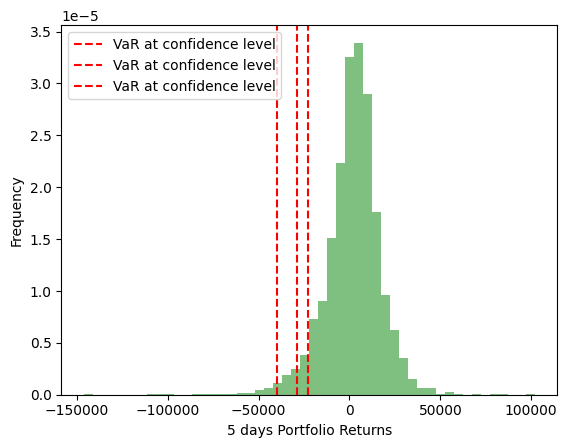

In [30]:
historical_x_day_returns_dollars = historical_x_day_return * portofolio_value
plt.hist(historical_x_day_returns_dollars, bins=50, density=True, alpha=0.5, color='g')
for confidence_level, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=VaR, color='r', linestyle='--', label=f'VaR at confidence level'.format(int(confidence_level*100)) )
plt.legend()
plt.xlabel(f'{days} days Portfolio Returns')
plt.ylabel('Frequency')
plt.show()